 # Linear Regression의 cost 최소화 알고리즘의 원리

### 1. Gradient descent algorithm (경사하강)

 - cost가 제일 작은 값을 찾는 방법 

 - 아무 점에서나 시작할 수 있음, 조금씩 W와 b를 변화시킴

 - cost함수를 W 값에 대해 미분, cost함수는 추정값과 실제값의 차이의 제곱의 평균

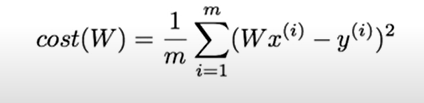

 - 다음 추정 W를 구하는 수식(아래)

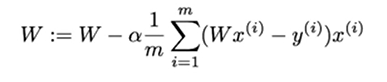

 - Convex function : 밥그릇을 엎어놓은 것과 같은 모양 함수

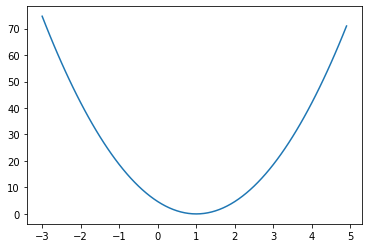

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()
    


 - Convex function이 생성됨

 - learning_rate 0.1로 설정하고 위에 수식을 그대로 구현한 것

learning_rate = 0.1 <br>
gradient = tf.reduce_mean((W * X - Y)*X) <br>
descent = W - learning_rate * gradient <br>
update = W.assign(descent) <br>

- 위 코드는 직접 경사하강법을 구현한 것이고<br>
아래 코드는 tensorflow 를 활용한 것

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)<br>
train = optimizer.minimize(cost)

In [11]:
import tensorflow as tf

X = [1,2,3]
Y = [1,2,3]

W = tf.Variable(5.0)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0


 - Optinal : compute_gradient and apply_gradient